Submission untuk kelas: Belajar Machine Learning untuk Pemula

Nama: Arga Jonathan A

Email: argajonathan58@gmail.com


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_paper_scissors.zip

--2021-03-15 15:42:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_paper_scissors.zip’

/tmp/rock_paper_sci 100%[===================>] 307.92M  1.61MB/s    in 3m 57s  

2021-03-15 15:46:21 (1.30 MB/s) - ‘/tmp/rock_paper_scissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# cek isi folder 'rockpaperscissors'
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'rock', 'paper']

In [ ]:
# terdapat folder 'rps-cv-images' & file 'README_rpc-cv-images.txt' yang tidak diperlukan dan akan dihapus
import shutil,os
base_dir = '/tmp/rockpaperscissors'
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

In [ ]:
# Memisahkan folder training dan validataion dengan split folder
!pip install split_folders

In [ ]:
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors', output='/tmp/rockpaperscissors/new', seed=1337, ratio=(.6,.4))

Copying files: 2188 files [00:00, 3801.79 files/s]


In [ ]:
# membagi dataset menjadi train set dan validation set
base_dir = '/tmp/rockpaperscissors/new'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

image_generator = ImageDataGenerator(
                      rescale=1/255, 
                      horizontal_flip=True,
                      rotation_range=30,
                      shear_range = 0.1,
                      fill_mode='wrap')    

train_set = image_generator.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        shuffle=True,
        seed=42,
        class_mode='categorical')

validation_set = image_generator.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        shuffle=True,
        seed=42,
        class_mode='categorical')


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_set,
    steps_per_epoch=25,
    epochs=25,
    validation_data = validation_set,
    validation_steps=5,
    verbose=2,
)

Epoch 1/25
25/25 - 24s - loss: 1.0914 - accuracy: 0.3487 - val_loss: 1.0373 - val_accuracy: 0.4250
Epoch 2/25
25/25 - 22s - loss: 0.9139 - accuracy: 0.5325 - val_loss: 0.7646 - val_accuracy: 0.6313
Epoch 3/25
25/25 - 22s - loss: 0.6500 - accuracy: 0.6950 - val_loss: 0.4129 - val_accuracy: 0.8875
Epoch 4/25
25/25 - 22s - loss: 0.5951 - accuracy: 0.7750 - val_loss: 0.4438 - val_accuracy: 0.8250
Epoch 5/25
25/25 - 21s - loss: 0.4264 - accuracy: 0.8363 - val_loss: 0.2915 - val_accuracy: 0.9125
Epoch 6/25
25/25 - 22s - loss: 0.3977 - accuracy: 0.8600 - val_loss: 0.4194 - val_accuracy: 0.8562
Epoch 7/25
25/25 - 22s - loss: 0.3829 - accuracy: 0.8600 - val_loss: 0.3473 - val_accuracy: 0.8813
Epoch 8/25
25/25 - 22s - loss: 0.3204 - accuracy: 0.8637 - val_loss: 0.2550 - val_accuracy: 0.9250
Epoch 9/25
25/25 - 22s - loss: 0.3061 - accuracy: 0.9025 - val_loss: 0.1810 - val_accuracy: 0.9500
Epoch 10/25
25/25 - 22s - loss: 0.3096 - accuracy: 0.8875 - val_loss: 0.2107 - val_accuracy: 0.9125
Epoch 11/

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png


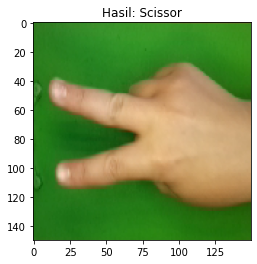

In [ ]:
# Prediksi gambar yang diupload
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mmig
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])

  hasil_prob = model.predict(images) 
  hasil_label = hasil_prob.argmax()

  if hasil_label == 0:
    plt.title("Hasil: Paper")
  elif hasil_label == 1:
    plt.title("Hasil: Rock")
  elif hasil_label == 2:
    plt.title("Hasil: Scissor")